## Описание проекта 

Компания владеющая развлекательным приложением Procrastinate Pro+, несмотря на огромные вложения в рекламу, последние несколько месяцев терпит убытки.  
Задача — разобраться в причинах и помочь компании выйти в плюс.

Доступны данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

Логи сервера с информацией о посещениях сайта visits_info_short:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Информация о покупках orders_info_short:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Информация о расходах на рекламу costs_info_short:
- Channel — идентификатор рекламного источника,
- Dt — дата проведения рекламной кампании,
- Costs — расходы на эту кампанию.

Основные вопросы для изучения:
- откуда приходят пользователи и какими устройствами они пользуются;
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент;
- когда расходы на привлечение клиента окупаются;
- какие факторы мешают привлечению клиентов.

## Загрузка данных и подготовка их к анализу

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime, timedelta

In [2]:
# Загрузим данные и посмотрим на них
try:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')
except FileNotFoundError as e:
    print(e)
    print("")
    print("Please wait for downloading from Yandex")
    visits = pd.read_csv('https://***********************************************')
    orders = pd.read_csv('https://***********************************************')
    costs = pd.read_csv('https://************************************************')
    
display(visits.head())
display(orders.head())
display(costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [3]:
# Проверим формат данных
visits.info()
print("")
orders.info()
print("")
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column 

Пропусков нет. Необходимо преобразование типов данных для дат. Так же проверим наличие дубликатов.

In [4]:
# Преобразуем данные
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [5]:
# Проверка дубликатов
print("Дабликатов в visits:", visits.duplicated().sum())
print("Дабликатов в orders:", orders.duplicated().sum())
print("Дабликатов в costs :", costs.duplicated().sum())

Дабликатов в visits: 0
Дабликатов в orders: 0
Дабликатов в costs : 0


In [6]:
# проверим наличие пропусков
display(
    round((visits.isna().mean()*100),2),
    round((orders.isna().mean()*100),2),
    round((costs.isna().mean()*100),2)
)

User Id          0.0
Region           0.0
Device           0.0
Channel          0.0
Session Start    0.0
Session End      0.0
dtype: float64

User Id     0.0
Event Dt    0.0
Revenue     0.0
dtype: float64

dt         0.0
Channel    0.0
costs      0.0
dtype: float64

**Вывод**  
Импортированы и изучены предоставленные данные. Произведена замена типов. Данные проверены на наличие пропусков и дубликатов.

## Задание функций для расчета и анализа LTV, ROI, удержания и конверсии

### Функция для создания пользовательских профилей

In [7]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['User Id', 'Session Start'])
        .groupby('User Id')
        .agg(
            {
                'Session Start': 'first',
                'Channel': 'first',
                'Device': 'first',
                'Region': 'first',
            }
        )
        .rename(columns={'Session Start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['User Id'].isin(orders['User Id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'Channel'])
        .agg({'User Id': 'nunique'})
        .rename(columns={'User Id': 'unique_users'})
        .reset_index()
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'Channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'Channel', 'acquisition_cost']],
        on=['dt', 'Channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


### Функция для расчёта удержания

In [8]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['User Id', 'Session Start']], on='User Id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['Session Start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='User Id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта конверсии

In [9]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['User Id', 'Event Dt'])
        .groupby('User Id')
        .agg({'Event Dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['User Id', 'Event Dt']], on='User Id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (result_raw['Event Dt'] - result_raw['first_ts']).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='User Id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта LTV и ROI

In [10]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['User Id', 'Event Dt', 'Revenue']], on='User Id', how='left'
    )
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (result_raw['Event Dt'] - result_raw['first_ts']).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='Revenue', aggfunc='sum'
        )
        
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['User Id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions: dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция для визуализации удержания

In [11]:
# функция для сглаживания

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [12]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
 
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания платящих пользователей на {}-й день'.format(horizon))

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания неплатящих пользователей на {}-й день'.format(horizon))
    
    plt.tight_layout()
    plt.show()

### Функция для визуализации конверсии

In [13]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI

In [14]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

In [15]:
# получим профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,User Id,first_ts,Channel,Device,Region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [16]:
# Определим минимальную и максимальную даты привлечения пользователей
max_dt = profiles['dt'].max()
min_dt = profiles['dt'].min()
print(f"Минимальная {min_dt} и максимальная {max_dt} даты привлечения.")

Минимальная 2019-05-01 и максимальная 2019-10-27 даты привлечения.


### Распределение клиентов по странам

In [17]:
# создадим функцию для анализа в зависимости от исследуемого параметра
def payment_ratio(param):
    output = (profiles.groupby(param)
            .agg({'User Id': 'nunique', 'payer': 'mean'})
            .sort_values(by='User Id', ascending=False)
            .rename(columns={'User Id':'users', 'payer': 'payer ratio'})
             )
    df = output.reset_index()
    plt.figure(figsize=(15, 10))
    
    ax1 = plt.subplot(2, 1, 1)
    plt.bar(output.reset_index()[param], df['users'])
    plt.title('Число клиентов по ' + param)
    plt.xticks(rotation = 45)
    
    ax2 = plt.subplot(2, 1, 2)
    plt.bar(output.reset_index()[param], df['payer ratio'])
    plt.title('Доля платещих клиентов по ' + param)
    plt.xticks(rotation = 45)
    
    plt.tight_layout()
    plt.show()
    return output
     

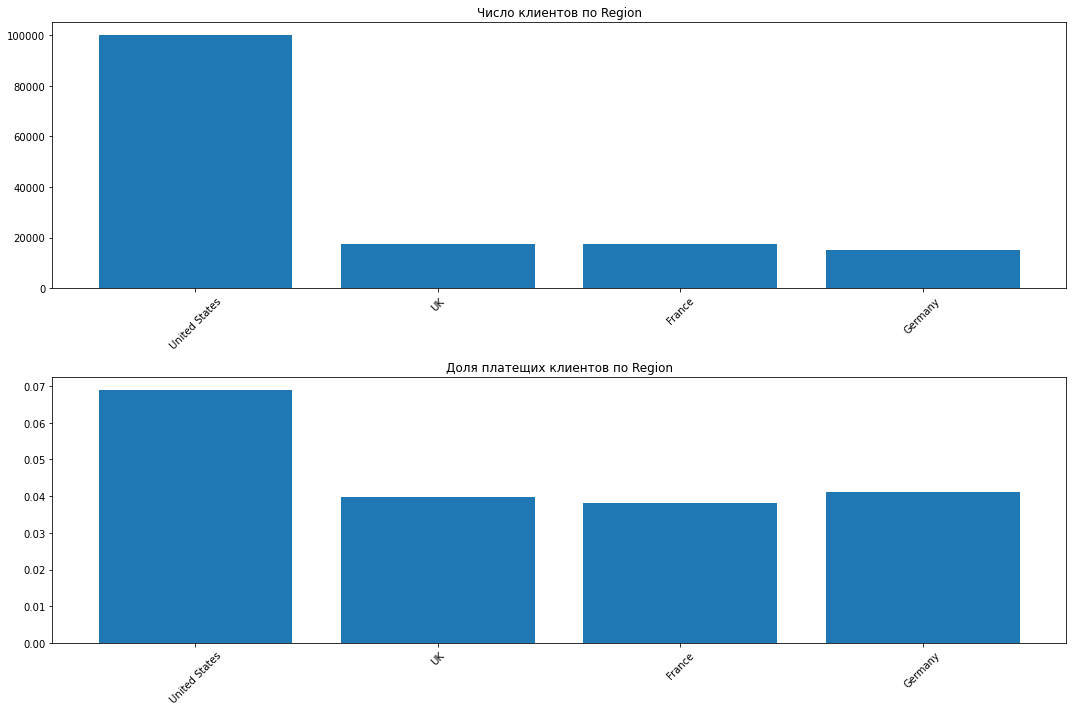

,users,payer ratio
Region,,
United States,100002,0.069019
UK,17575,0.039829
France,17450,0.037994
Germany,14981,0.041119


In [18]:
payment_ratio(param='Region')

**Вывод**  
Наибольшее число клиентов из US. Так же для US характерна большая доля платящих клиентов. 

### Распределение клиентов по используемым устройствам

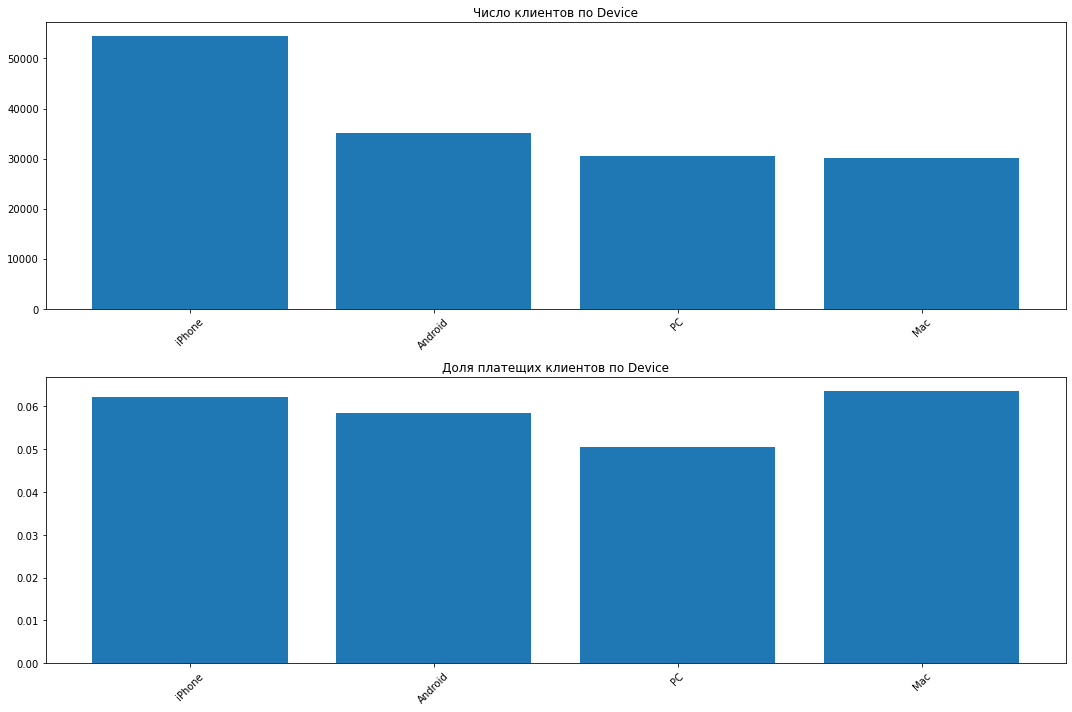

,users,payer ratio
Device,,
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468
Mac,30042,0.063644


In [19]:
payment_ratio(param='Device')

**Вывод**  
Наибольшее число клиентов используют iPhone. Однако, доля платящих клиентов выше для устройств MAC. Для всех типов устройств доля платящих клментов выше 50%

### Распределение клиентов по каналам привлечения

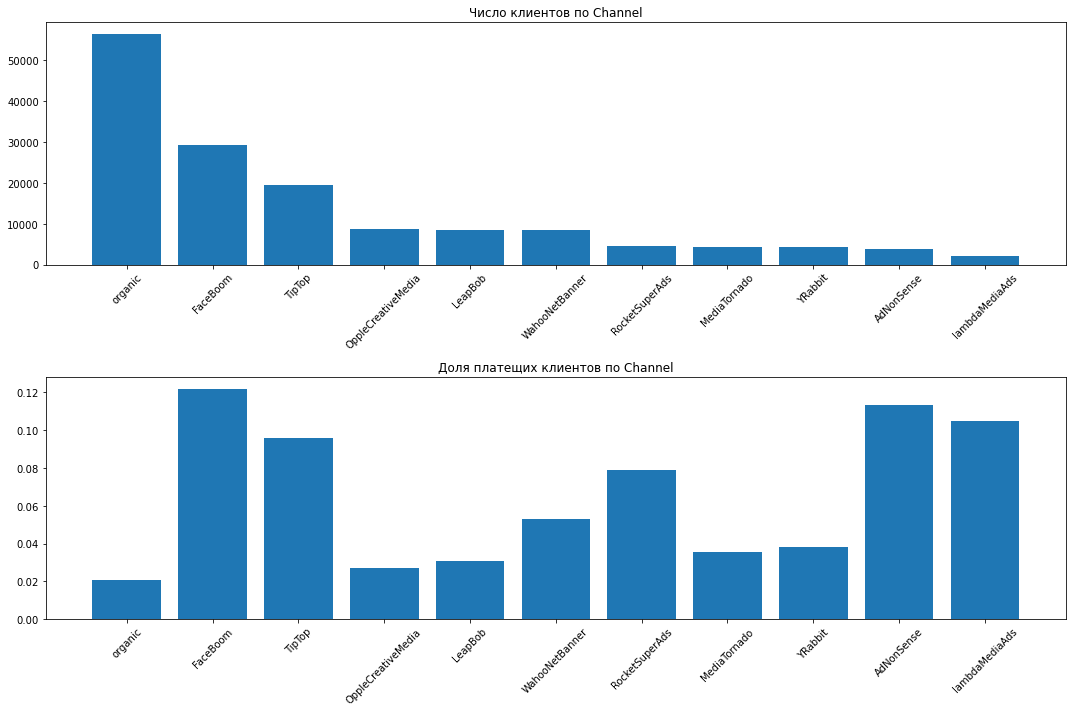

,users,payer ratio
Channel,,
organic,56439,0.020553
FaceBoom,29144,0.122049
TipTop,19561,0.096007
OppleCreativeMedia,8605,0.027077
LeapBob,8553,0.030633
WahooNetBanner,8553,0.052964
RocketSuperAds,4448,0.079137
MediaTornado,4364,0.035747
YRabbit,4312,0.038265


In [20]:
payment_ratio(param='Channel')

**Вывод**  
Наибольшее число - органические клиенты. Основные каналы привлечения платящих клиентов: FaceBoom, AdNonSense, lambdaMediaAds и TipTop.	

## Затраты на маркетинг

### Общая сумма затрат

In [21]:
ad_total_cost = costs['costs'].sum()
print("Общая сумма расходов на маркетинг - ", int(ad_total_cost))

Общая сумма расходов на маркетинг -  105497


### Распределение затрат по каналам привлечения

In [22]:
df = (
    costs.groupby('Channel')
    .agg({'costs': 'sum'})
    .sort_values(by='costs', ascending=False)
)
df ['share in total'] = round(df['costs'] / ad_total_cost, 4)
df

,costs,share in total
Channel,,
TipTop,54751.30,0.5190
FaceBoom,32445.60,0.3075
WahooNetBanner,5151.00,0.0488
AdNonSense,3911.25,0.0371
OppleCreativeMedia,2151.25,0.0204
RocketSuperAds,1833.00,0.0174
LeapBob,1797.60,0.0170
lambdaMediaAds,1557.60,0.0148
MediaTornado,954.48,0.0090


In [23]:
df = df.reset_index().sort_values(by='costs')

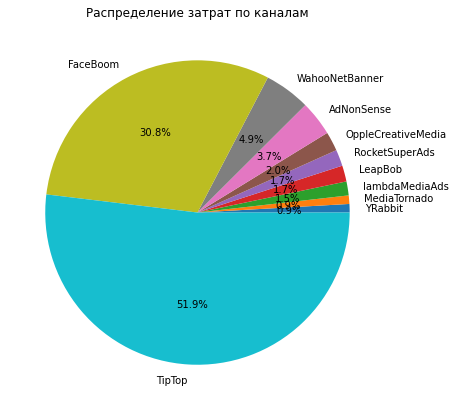

In [24]:
plt.figure(figsize=(15, 7))
labels = df['Channel']
plt.pie(
    df['share in total'], 
    labels=df['Channel'], 
    autopct='%1.1f%%'
)
plt.title('Распределение затрат по каналам')
plt.show()

**Вывод**  
Можно выделить два основных канала, сумма заьрат на рекламу в которых составляет более 80% от общих затрат.
Можно отметить, что эти каналы занимают первое и четвертое места по доли платящих клиентов.

### Динимика расходов на рекламную компанию с разбивкой по каналам

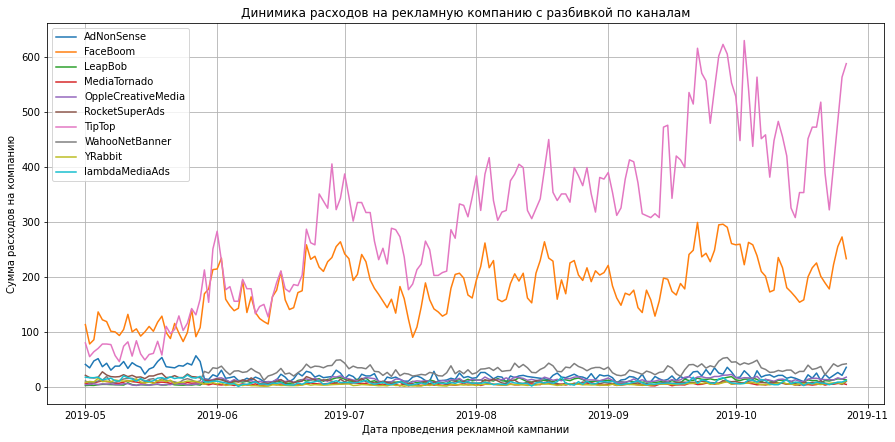

In [25]:
costs.pivot_table(index='dt', columns='Channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(15, 7))

plt.title('Динимика расходов на рекламную компанию с разбивкой по каналам')
plt.ylabel('Сумма расходов на компанию')
plt.xlabel('Дата проведения рекламной кампании')
plt.legend()
plt.show()

**Вывод**  
Упомянутые в предыдущем пункте два канала, показыват рост расходов на рекламу. 

### Средняя стоимость привлечения клиента

In [26]:
# Средняя стоимость привлечения по каналам
profiles.groupby('Channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
Channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [27]:
# исключим пользователей с органическим трафиком
profiles = profiles.query('Channel != "organic"')

In [28]:
# Средняя стоимость привлечения по всем каналам
print("Средняя стоимость привлечения по каналам", round(profiles['acquisition_cost'].mean(), 2))

Средняя стоимость привлечения по каналам 1.13


**Вывод**  
Стоимость привлечения по двум каналам лидерам значительно выше средней. TipTop самый дорогой канал по стоимости привлечения, более чем в 2 раза выше средней. 

## Оценка окупаемость рекламы

In [29]:
# Установим момент и горизонт анализа данных. 
# На календаре 1 ноября 2019 года, и зададим горизонт анализа.

observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

### Общая окупаемость рекламы

Проанализируем общую окупаемость. Построим графики LTV и ROI, динамики LTV, CAC и ROI.

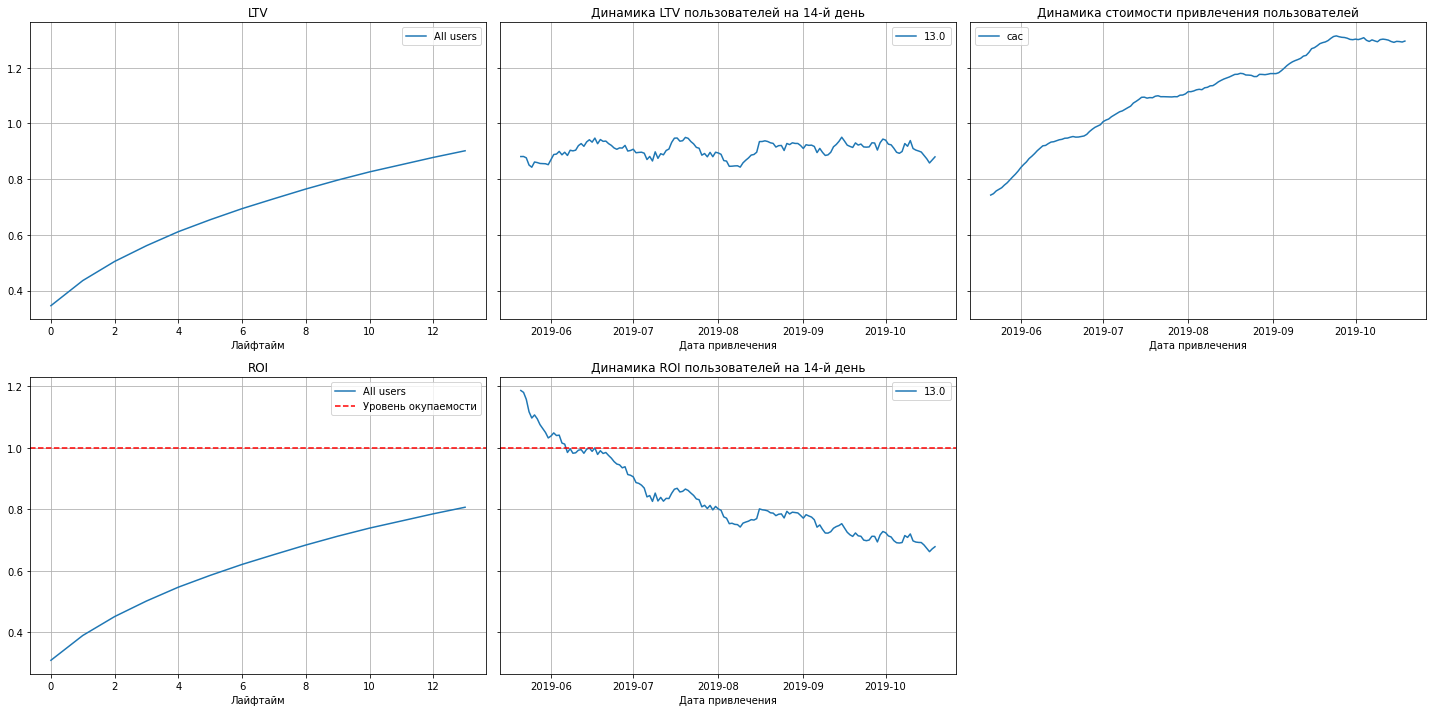

In [30]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=21)

**Выводы:**
- LTV стабильный и находится в диапазоне 0.8 - 1.0
- Стоимость привлечения росла до второй половины сентября.
- Реклама не окупается. ROI около 0.8 на горизонте анализа. Динамика показывает убыточность уже со второй половины июня.


### Анализ окупаемость рекламы с разбивкой по используемым устройствам

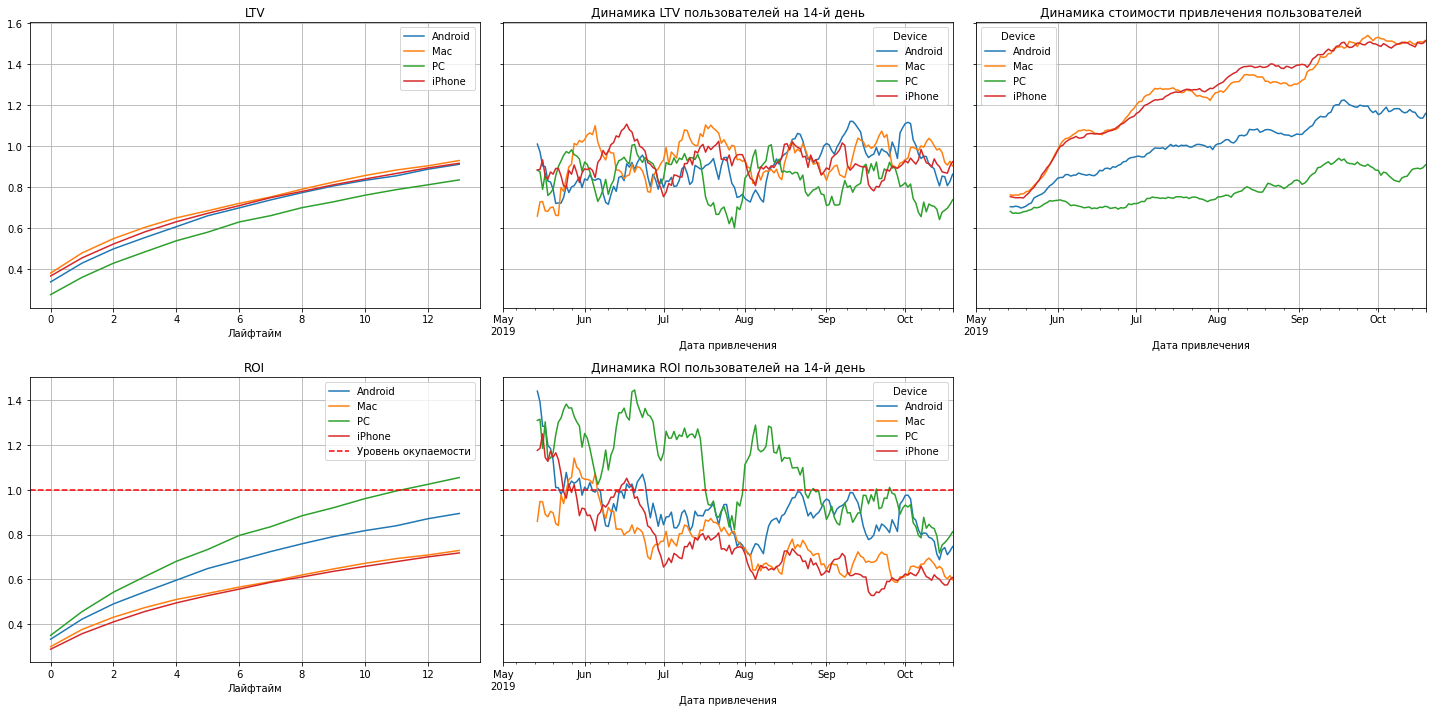

In [31]:
# считаем LTV и ROI
dimensions=['Device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days,
    dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)


**Выводы:**
Затраты на клиентов с PC окупаются, хотя и выручка с таких клиентов ниже, чем по остальным устройствам. Причина - низкая начальнаая стоимость привлечения и не стольсущественный рост во времени. Затраты на привлечение клиентов с MAC и iPhone самые высокие, что обуславливает возврат инвестиций на границе 14 дней в районе 70%.

### Анализ окупаемость рекламы с разбивкой по рекламным каналам.

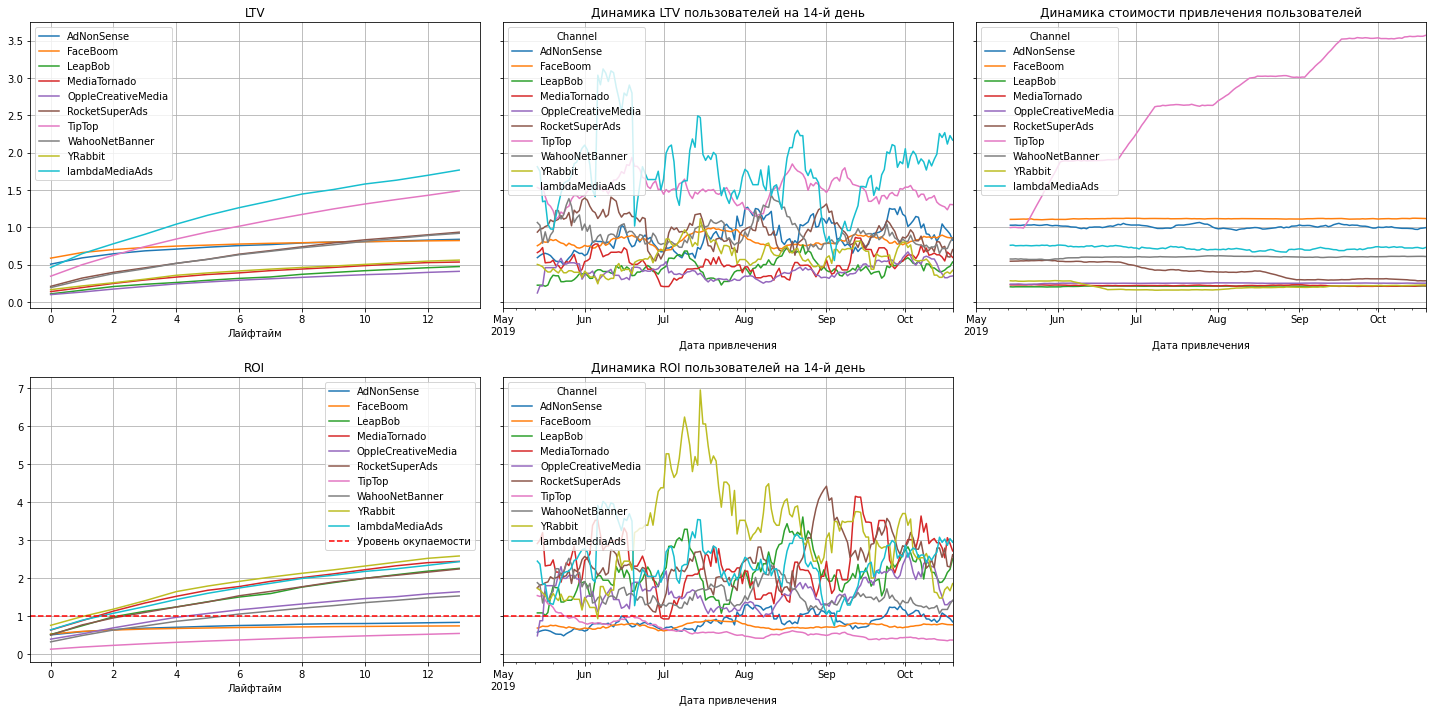

In [32]:
# считаем LTV и ROI
dimensions=['Channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days,
    dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)


**Выводы:**
- TipTop аутсайдер по окупаемости. Затраты на привлечение в канале постоянно растут.
- FaceBoom при значетельной доле в расходах на рекламу и большом числе пользователей, не окупается
- lambdaMediaAds один из лидеров по окупаемости при том, что как было отмечено ранее, канал привлечения входит в ТОП-4 по доле платящих клиентов

### Анализ окупаемость рекламы с разбивкой по странам.

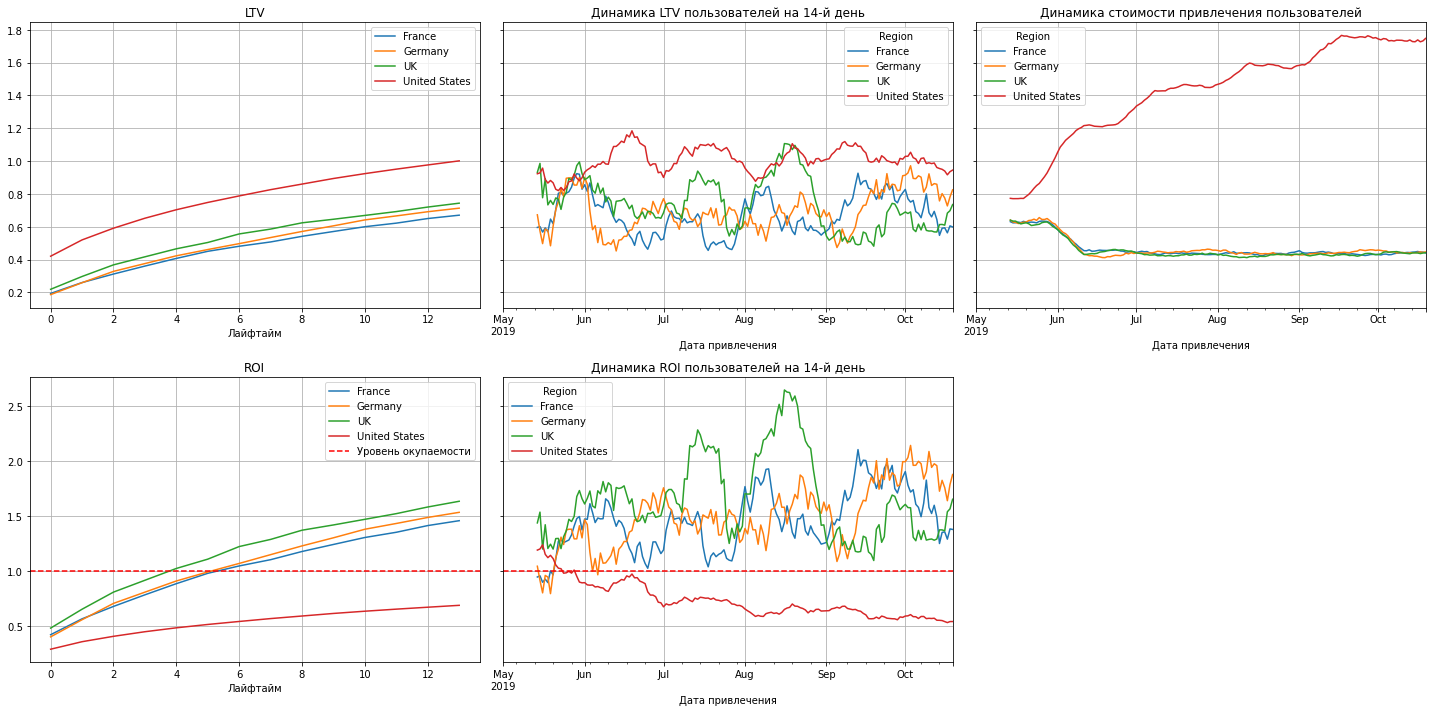

In [33]:
# считаем LTV и ROI
dimensions=['Region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days,
    dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)


**Выводы:**
Клиенты из US, имея наибольшую долю (65%) среди общего числа оказывают негативное влияние на окупаемость рекламы за счет постоянного роста стоимости привлоечения.

Рассмотрим разбивку по канал привлечения только для US.

### Анализ окупаемости рекламы United States с разбивкой по каналам

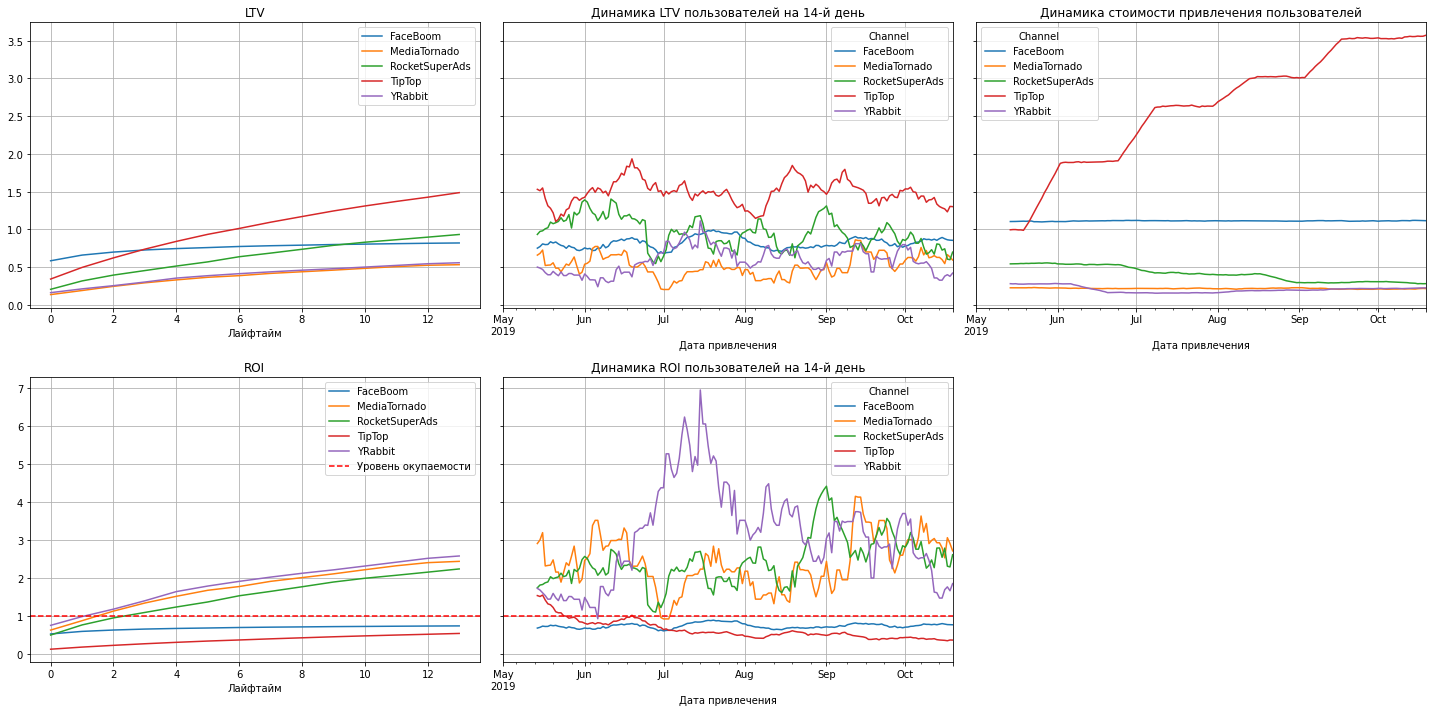

In [34]:
# считаем LTV и ROI
dimensions=['Channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('Region == "United States"'), 
    orders, observation_date, horizon_days,
    dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)


**Выводы:**
Самый большой по сумму затрат канал, Tip Top имеет самую высокую и постоянно растущую стоимоть привлечения. При этом возврат на инвестиции чуть больше половины. FaceBoom так же не окупается, но имеет лучшие показатели: ниже и постоянна стоимость привлечения, выше процент возврата на вложения. Стоит обратить внимание на слабый рост LTV для FaceBoom.

### Конверсия и удержание с разбивкой по устройствам пользователей

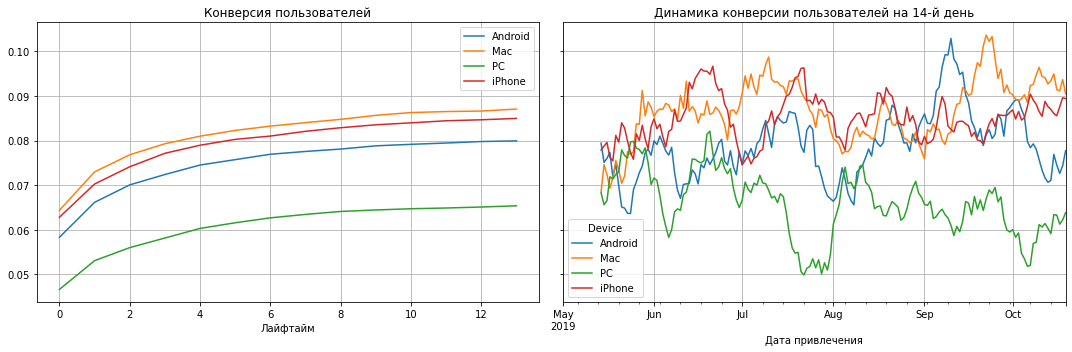

In [35]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['Device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

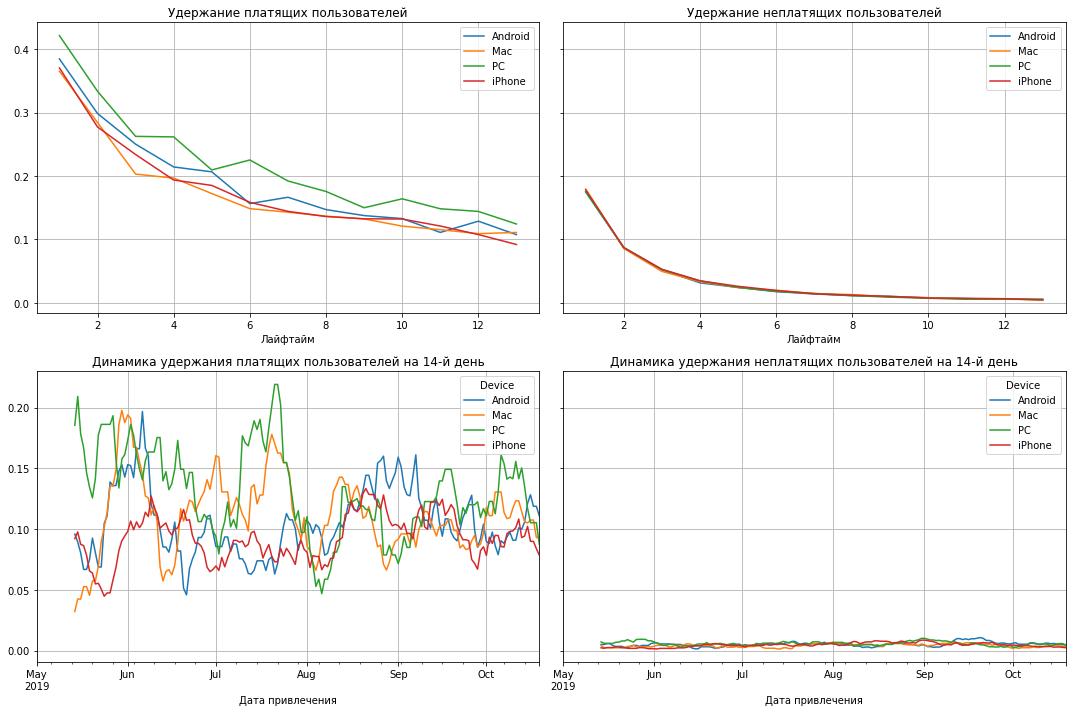

In [36]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14)

**Вывод**  
При лучшем удержании пользователи на PC показывают конверсию ниже остальных. Возможно, существуют сложности связанные с особенностью используемой ОС. Динамика конверсии PC до августа соответствовала общим трендам, но делее имела значительные отличие.

### Конверсия и удержание с разбивкой по регионам

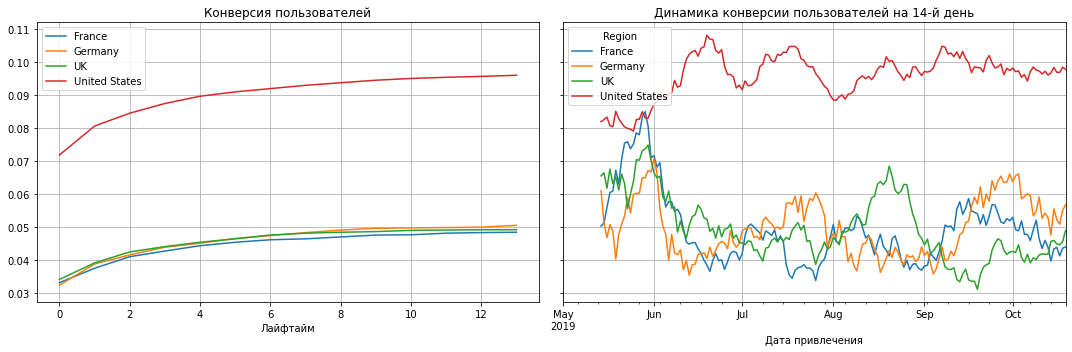

In [37]:
# смотрим конверсию с разбивкой по регионам
dimensions = ['Region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

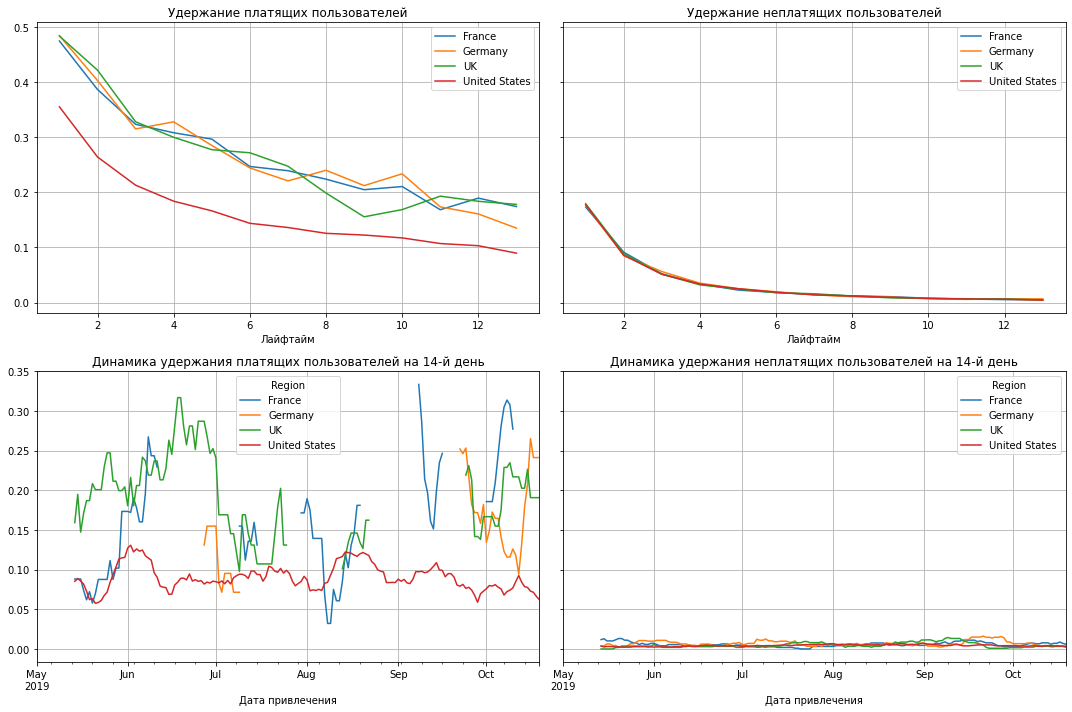

In [38]:
# смотрим удержание с разбивкой по регионам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14)

График динамики удержания платящих клиентов для трёх из четырёх стран имеют разрывы. Вороятно это связано с небольшим числом привлечённых платящих пользователей в этих странах. Посмотрим на медианное число платящих пользователей в день с разбивкой по странам.

In [39]:
display(
    retention_history.query('payer == True')
    .groupby('Region')
    .agg({'cohort_size': 'median'})
    .rename(columns={'cohort_size': 'Медиана числа новых платящих пользователей в день'})
    .sort_values(by='Медиана числа новых платящих пользователей в день', ascending=False)
    .astype(int)
) 

,Медиана числа новых платящих пользователей в день
Region,
United States,33
France,3
Germany,3
UK,3


Предположение оказалось верным.

**Вывод**  
Лучшая конверсия у US, но удержание немного хуже остальных регионов.

### Конверсия и удержание с разбивкой по каналам привлечения

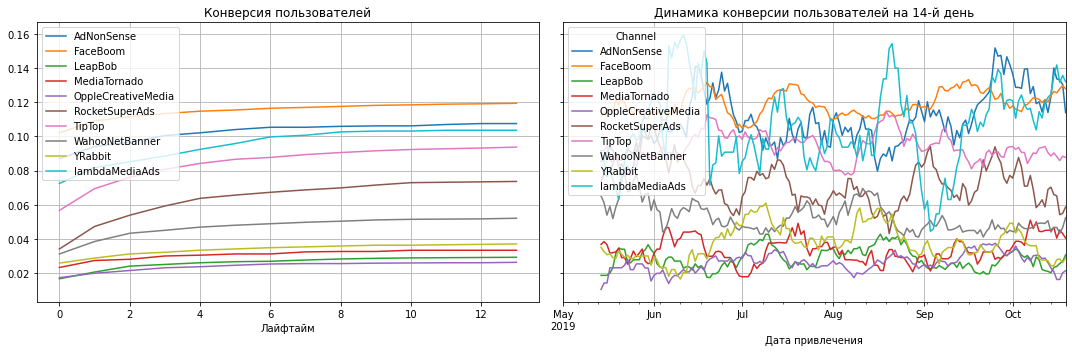

In [40]:
# смотрим конверсию с разбивкой по каналам привлечения
dimensions = ['Channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

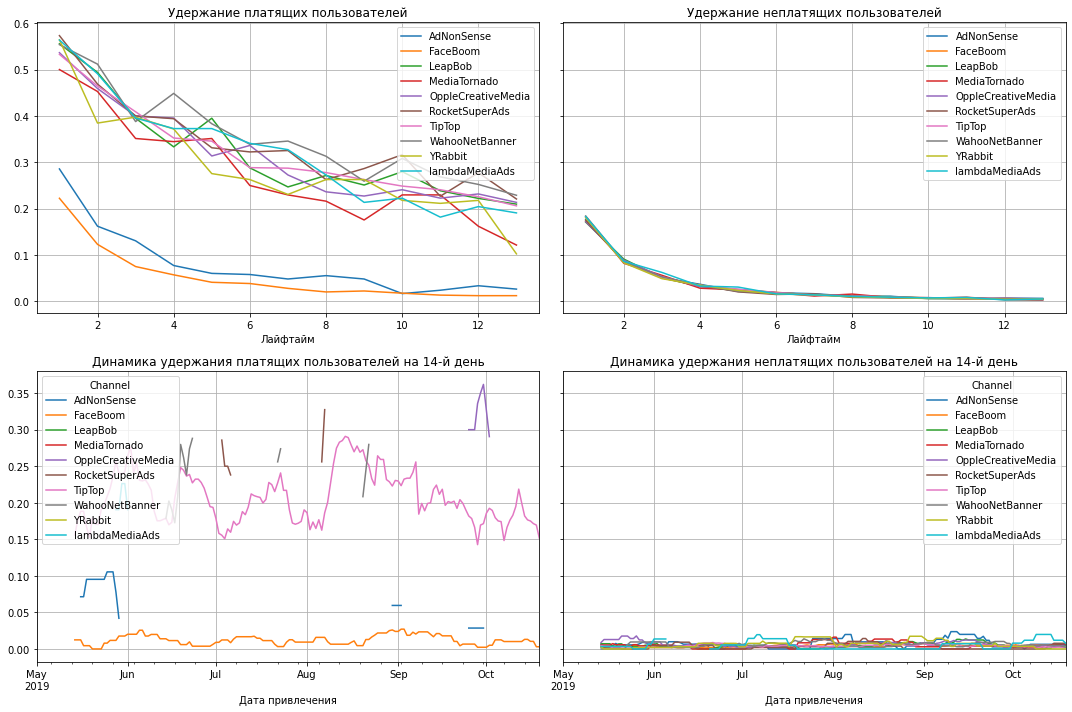

In [41]:
# смотрим удержание с разбивкой по каналам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14)

Снова разрывы у графиков динамики. Посмотрим на медианное число платящих пользователей в день с разбивкой по каналам.

In [42]:
display(
    retention_history.query('payer == True')
    .groupby('Channel')
    .agg({'cohort_size': 'median'})
    .rename(columns={'cohort_size': 'Медиана числа новых платящих пользователей в день'})
    .sort_values(by='Медиана числа новых платящих пользователей в день', ascending=False)
    .astype(int)
) 

,Медиана числа новых платящих пользователей в день
Channel,
FaceBoom,19
TipTop,9
WahooNetBanner,3
AdNonSense,2
LeapBob,2
RocketSuperAds,2
MediaTornado,1
OppleCreativeMedia,1
YRabbit,1


Предположение подтвердилось.

**Вывод**  
Для канала с самой высокой конверсией FaceBoom характерно стабильно низкое удержание платящих пользователей.

## Общие выводы

Общая характеристика клиентов:
- Наибольшее число клиентов представляют US. Так же для US характерна большая доля платящих клиентов. 
- Наибольшее число клиентов используют iPhone. Однако, доля платящих клиентов выше для устройств MAC. Для всех типов устройств доля платящих клментов выше 50%
- Наибольшее число - органические клиенты. Основные каналы привлечения платящих клиентов: FaceBoom, AdNonSense, lambdaMediaAds и TipTop.

Общая характеристика затрат на рекламу:
- Общая сумма расходов на рекламу -  105497
- Выделяются два основных канала на долю которых приходиться более 80% всех затрат. По этим канам наблюдается рост расходов.
- Стоимость привлечения по этим двум каналам лидерам значительно выше средней. TipTop самый дорогой канал по стоимости привлечения (в 4 раза выше среднего). 

Окупаемость затрат на рекламу:
- Реклама не окупается. ROI около 0.8 на горизонте анализа. Динамика показывает убыточность уже со второй половины июня.
- LTV стабильный и находится в диапазоне 0.8 - 1.0
- Затраты на клиентов с PC окупаются, хотя и выручка с таких клиентов ниже, чем по остальным устройствам. Причина - низкая начальнаая стоимость привлечения и не стольсущественный рост во времени. Затраты на привлечение клиентов с MAC и iPhone самые высокие, что обуславливает возврат инвестиций на границе 14 дней в районе 70%.
- TipTop аутсайдер по окупаемости. Затраты на привлечение в канале постоянно растут. FaceBoom при значетельной доле в расходах на рекламу и большом числе пользователей, не окупается. lambdaMediaAds один из лидеров по окупаемости при том что канал входит в ТОП-4 по доле платящих клиентов.
- Клиенты из US, имея наибольшую долю (65%) среди общего числа, в целом, оказывают негативное влияние на окупаемость рекламы за счет постоянного роста стоимости привлечения. Анализ клиентов из US в разрезе каналов привлечения показывает негативное влияние двух каналов на общую окупаемость. Самый большой по сумме затрат канал, Tip Top имеет самую высокую и постоянно растущую стоимоть привлечения. При этом возврат на инвестиции чуть больше половины. FaceBoom так же не окупается.
- При лучшем удержании, пользователи на PC показывают конверсию ниже остальных.
- Лучшая конверсия у US, но удержание немного хуже остальных регионов.
- Для канала с самой высокой конверсией FaceBoom характерно стабильно низкое удержание платящих пользователей.

## Рекомендации

Необходимо изучить причины низкой (относительно других) конверсии клиентов с устройствам PC.  
Необходимо изучить причины низкого (относительно других) удержания клиентов из US.  
Необходимо перереспределение рекламных расходов по канал продаж. Обратить внимание на FaceBoom - большие затраты, высокая конверсия, но минимальное их всех каналов удержание. Обратить внимание на lambdaMediaAds - небольшие затраты, высокая конверсия, хорошее удержание, высокая доля платящих клиентов.  
Обратить внимание на слабый рост LTV клиентов из US привлеченных через FaceBoom.
Перераспределить чать бюджетов с FaceBoom и Tip Top на остальные каналы привлечения в US.
